# Forecasting TEC into the Future Using the LSTM Deep Learning  Method 

In this python notebook, we want to apply the LSTM deep learning method to forecast ionospheric TEC.
 
**The TEC data  is hourly (or 30 minutes) for faster computation!**

In this case, we are using the time series vertical TEC only to forecast the future TEC using the most popular deep learning  LSTM: Long Short-Term Method.  A good explanation of the LSTM can be found [here](https://colah.github.io/posts/2015-08-Understanding-LSTMs/).

My appluication of the LSTM method to forecast a simple sine wave time series data is shown in [my github](https://github.com/gzewdie)
 
Results of relationship between different solar, solar terrestrial parameters etc  and ground based parameters that  
influence the physics of ionospheric TEC formation is shown in another notebook that will be found in [my github]
(https://github.com/gzewdie)

Please cite the papers that come out of these notebook(s) if you use it in any form. You can aske me through phygbki21@gmail.com (or gzewdie3@gatech.edu) if you want to know which papers to cite or for any kind of question!

Thank you!

Gebreab K.  Zewdie

Georgia Tech 

October, 2019!

In [1]:
!pwd

/usr/scratch/ML_TEC_New


In [2]:
#Adding the following lines to a new script will clear all variables each time you rerun the script
from IPython import get_ipython
get_ipython().magic('reset -sf') 

In [3]:
#to ignore warnings 
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
   

In [4]:
 fxn()

/nethome/gzewdie3/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: deprecated
  """


In [3]:
#import useful libraries
import warnings
import time 
import numpy as np 
import pandas as pd
from keras import optimizers 
from keras.utils import plot_model 
from keras.models import Sequential, Model 
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Using TensorFlow backend.


In [2]:
#import ploting libraries 
import matplotlib.pyplot as plt 
from pylab import rcParams
import seaborn as sns
#import chart_studio.plotly as py 
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode, iplot

In [7]:
%matplotlib inline 
#warning.filterwarning("ignore")
init_notebook_mode(connected=True)

In [8]:
import tensorflow as tf
tf.random.set_seed(1)

In [9]:
#Read my TEC data!
df_allTEC=pd.read_csv('top15ParametersMeanTEC.csv')

In [10]:
df_allTEC.shape

(3156480, 13)

In [11]:
df_allTEC.head(10)

,F10.7,Layman Alpha,ASY_D,PC index,Dst,Lon Angle of B,R Sun spot,AU_INDEX,SYM_D,IMF B magn,Lat Angle of B,Sigma A/P ratio,vTEC
0,76.7,3.59,9,0.500000,-12.000000,138.200000,9.0,18,-1,4.3,-16.200000,0.001000,6.867400
1,76.7,3.59,9,0.496667,-11.983334,138.234999,9.0,18,-1,4.3,-16.018337,0.001033,6.837800
2,76.7,3.59,9,0.493333,-11.966667,138.269999,9.0,17,-1,4.3,-15.836673,0.001067,6.785000
3,76.7,3.59,9,0.490000,-11.950001,138.304998,9.0,16,-1,4.3,-15.655010,0.001100,6.750200
4,76.7,3.59,9,0.486667,-11.933335,138.339997,9.0,16,-1,4.3,-15.473347,0.001133,7.286875
5,76.7,3.59,9,0.483334,-11.916668,138.374997,9.0,15,-1,4.3,-15.291684,0.001167,7.265250
6,76.7,3.59,8,0.480000,-11.900002,138.409996,9.0,14,0,4.3,-15.110020,0.001200,7.214250
7,76.7,3.59,8,0.476667,-11.883336,138.444995,9.0,10,0,4.3,-14.928357,0.001233,7.173750
8,76.7,3.59,8,0.473334,-11.866669,138.479995,9.0,10,0,4.3,-14.746694,0.001267,7.140625
9,76.7,3.59,8,0.470001,-11.850003,138.514994,9.0,9,0,4.3,-14.565031,0.001300,7.075250


In [12]:
df_allTEC.tail()

,F10.7,Layman Alpha,ASY_D,PC index,Dst,Lon Angle of B,R Sun spot,AU_INDEX,SYM_D,IMF B magn,Lat Angle of B,Sigma A/P ratio,vTEC
3156475,140.5,4.57,4,-0.006667,8.0,107.780004,136.0,13,2,5.033333,9.253325,9.999,NaN
3156476,140.5,4.57,4,-0.005000,8.0,107.835003,136.0,12,2,5.025000,9.139994,9.999,NaN
3156477,140.5,4.57,4,-0.003333,8.0,107.890002,136.0,11,2,5.016666,9.026662,9.999,NaN
3156478,140.5,4.57,4,-0.001667,8.0,107.945001,136.0,11,2,5.008333,8.913331,9.999,NaN
3156479,140.5,4.57,3,0.000000,8.0,108.000000,136.0,11,2,5.000000,8.800000,9.999,NaN


In [13]:
#The time stamp is in this data! 
df_Date=pd.read_csv('tecApprDate.csv')

In [14]:
df_Date.head()

,year,month,day,hour,min,sec,dateUday
0,2008,1,1,0,0,0,733410.0
1,2008,1,1,0,1,0,733410.0
2,2008,1,1,0,2,0,733410.0
3,2008,1,1,0,3,0,733410.0
4,2008,1,1,0,4,0,733410.0


In [15]:
df_vTEC=df_allTEC[['vTEC']]

In [16]:
#Grasp the time and vertical TEC!
df_target=pd.concat([df_Date[['dateUday']], df_vTEC],axis=1)
df_targetAll=pd.concat([df_Date, df_vTEC],axis=1)

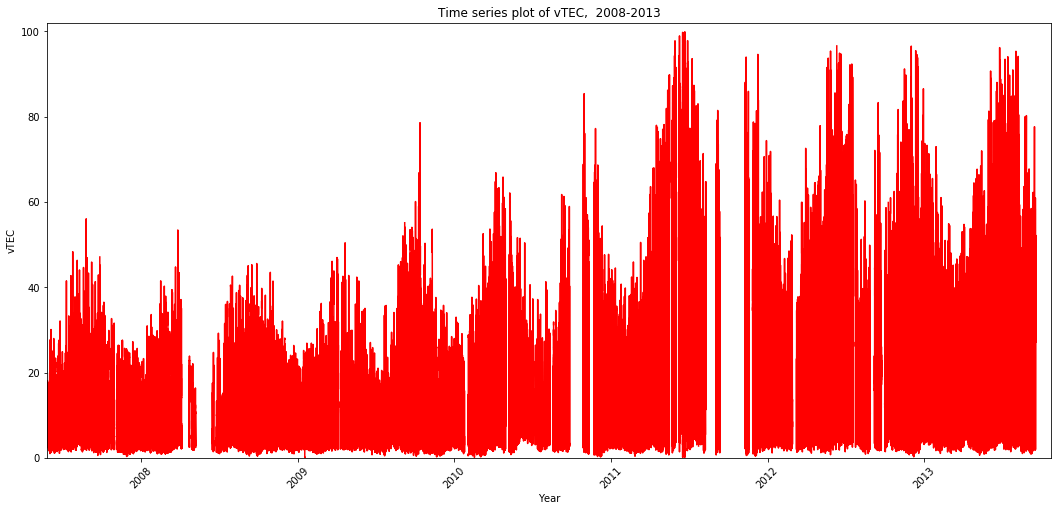

In [17]:
# plot the vTEC 
plt.figure(figsize=(18,8))
plt.plot(df_targetAll['vTEC'],'r')
plt.xlabel('Year')
plt.ylabel('vTEC')
plt.xlim(0,3156479+50000)
plt.ylim(0,102)
plt.xticks(np.arange(300000,3156479,500000),['2008','2009','2010','2011','2012','2013'],rotation=45)
plt.title('Time series plot of vTEC,  2008-2013')
plt.rcParams.update({'font.size': 16,'lines.linewidth':1.5})
plt.savefig('vTEC.png', facecolor='w', format='png')
plt.savefig('vTEC.eps', facecolor='w', format='eps')
plt.show()

As we see above there are gaps in thre vTEC data and needs to be cleaned!

# Convert TEC to Hourly/30 minutes/15 minutes

But before that, we need to  resample the data for better computation. Hence  I am conveting the TEC to houly (or 30, 15 minutes) measurements using the following commands

In [19]:
hourly=0
thirtymnts=1
fifteenmnts=0
if hourly==1:
    resample=60
elif thirtymnts==1:
    resample=30
elif fifteenmnts==1:
     resample=15
print('The vTEC data decance is {} hourly'.format(resample/60))

The vTEC data decance is 0.5 hourly


In [20]:
df_targetAllHr=df_targetAll.groupby(np.arange(len(df_targetAll))//resample).mean()

In [21]:
df_targetAllHr.head(10)

,year,month,day,hour,min,sec,dateUday,vTEC
0,2008.0,1.0,1.0,0.0,14.5,0.0,733410.0,7.006258
1,2008.0,1.0,1.0,0.0,44.5,0.0,733410.0,6.886732
2,2008.0,1.0,1.0,1.0,14.5,0.0,733410.0,6.380042
3,2008.0,1.0,1.0,1.0,44.5,0.0,733410.0,NaN
4,2008.0,1.0,1.0,2.0,14.5,0.0,733410.0,NaN
5,2008.0,1.0,1.0,2.0,44.5,0.0,733410.0,NaN
6,2008.0,1.0,1.0,3.0,14.5,0.0,733410.0,NaN
7,2008.0,1.0,1.0,3.0,44.5,0.0,733410.0,6.160703
8,2008.0,1.0,1.0,4.0,14.5,0.0,733410.0,6.395939
9,2008.0,1.0,1.0,4.0,44.5,0.0,733410.0,6.263172


In [22]:
df_targetAllHr.isnull().sum()

year            0
month           0
day             0
hour            0
min             0
sec             0
dateUday        0
vTEC        19120
dtype: int64

In [23]:
df_targetAllHr.dropna(how='any', inplace=True)
df_targetAllHr.isna().sum()

year        0
month       0
day         0
hour        0
min         0
sec         0
dateUday    0
vTEC        0
dtype: int64

In [24]:
df_targetAllHr.tail()

,year,month,day,hour,min,sec,dateUday,vTEC
105209,2013.0,12.0,31.0,20.0,44.5,0.0,735600.0,33.417061
105210,2013.0,12.0,31.0,21.0,14.5,0.0,735600.0,38.876419
105211,2013.0,12.0,31.0,21.0,44.5,0.0,735600.0,33.595325
105212,2013.0,12.0,31.0,22.0,14.5,0.0,735600.0,31.137120
105213,2013.0,12.0,31.0,22.0,44.5,0.0,735600.0,27.959446


In [25]:
df_targetAllHr.shape

(86096, 8)

In [26]:
allDate=df_targetAllHr[['year','month','day','hour','min','sec']]

In [27]:
testDate=allDate[-528:].reset_index()

In [28]:
testDate.shape

(528, 7)

In [29]:
testDate.head()

,index,year,month,day,hour,min,sec
0,104686,2013.0,12.0,20.0,23.0,14.5,0.0
1,104687,2013.0,12.0,20.0,23.0,44.5,0.0
2,104688,2013.0,12.0,21.0,0.0,14.5,0.0
3,104689,2013.0,12.0,21.0,0.0,44.5,0.0
4,104690,2013.0,12.0,21.0,1.0,14.5,0.0


In [30]:
df = pd.DataFrame({'year': testDate['year'].astype(int),
...                    'month': testDate['month'].astype(int),
...                    'day': testDate['day'].astype(int),
                       'hour':testDate['hour'].astype(int),
                    'minute':testDate['min'].apply(np.ceil).astype(int)
                   })


toDateTest=pd.to_datetime(df)

In [31]:
Datatt=df[['day','hour','minute']]

In [32]:
Datatt

,day,hour,minute
0,20,23,15
1,20,23,45
2,21,0,15
3,21,0,45
4,21,1,15
...,...,...,...
523,31,20,45
524,31,21,15
525,31,21,45
526,31,22,15


In [33]:
toDateTest

0     2013-12-20 23:15:00
1     2013-12-20 23:45:00
2     2013-12-21 00:15:00
3     2013-12-21 00:45:00
4     2013-12-21 01:15:00
              ...        
523   2013-12-31 20:45:00
524   2013-12-31 21:15:00
525   2013-12-31 21:45:00
526   2013-12-31 22:15:00
527   2013-12-31 22:45:00
Length: 528, dtype: datetime64[ns]

In [34]:
print('The six years of data has a size {} in the presence of NaN, showing the data was every minute (was originally 30 seconds). After resasampling every 15, 30 or 1 hour, the shape  {} of the data after removing NaN'.format(6*365*24*60,df_targetAllHr.shape[0] ))

The six years of data has a size 3153600 in the presence of NaN, showing the data was every minute (was originally 30 seconds). After resasampling every 15, 30 or 1 hour, the shape  86096 of the data after removing NaN


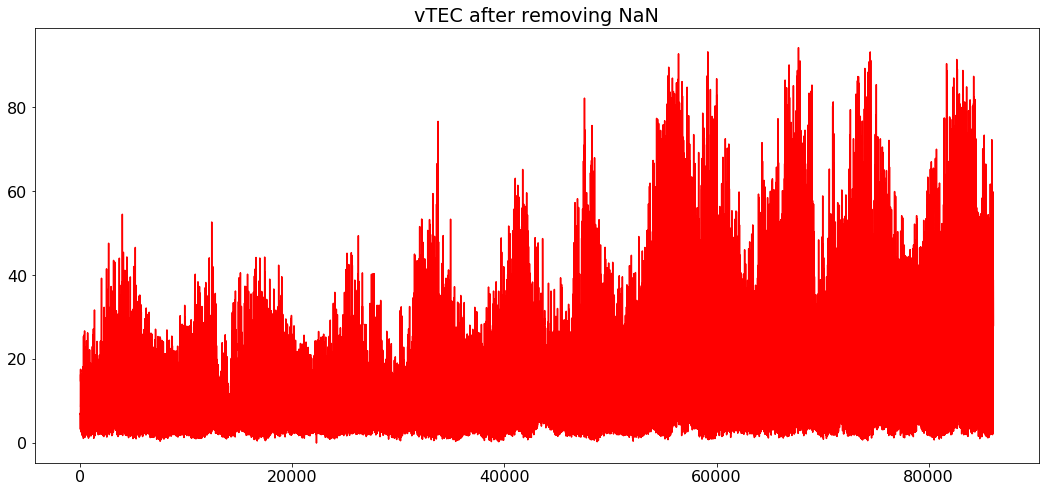

In [35]:
plt.figure(figsize=(18,8))
plt.plot(df_targetAllHr['vTEC'].values,'r')
plt.title('vTEC after removing NaN')
plt.rcParams.update({'font.size': 16,'lines.linewidth':1.5})
plt.show()

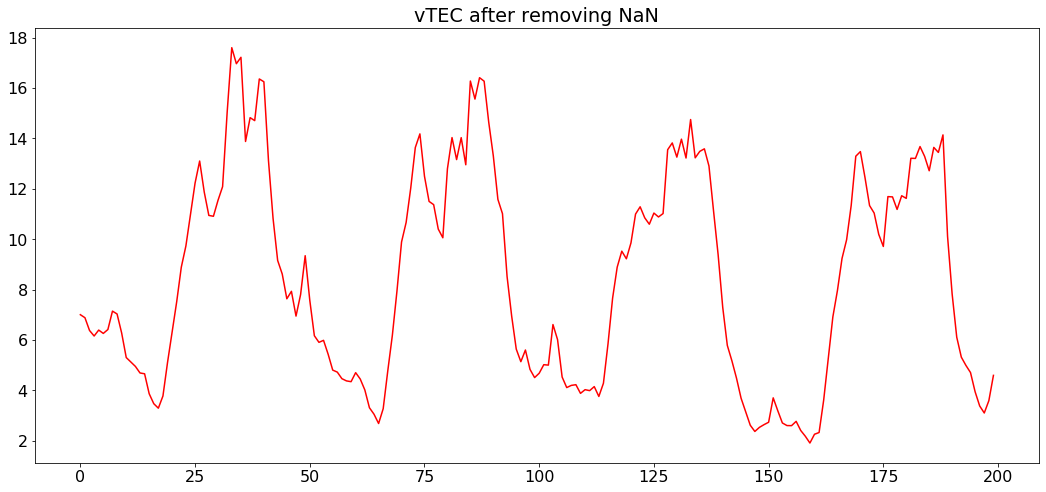

In [36]:
plt.figure(figsize=(18,8))
plt.plot(df_targetAllHr['vTEC'][0:200].values,'r')
plt.title('vTEC after removing NaN')
plt.rcParams.update({'font.size': 16})
plt.show()

In [37]:
dataset = df_targetAllHr.vTEC.values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))

In [38]:
dataset.shape

(86096, 1)

In [39]:
#function to normalize the data 
def to_Normalize(dataSet):
    scaler=MinMaxScaler(feature_range=(0,1))
    dataScaled=scaler.fit_transform(dataSet)
    return scaler, dataScaled

In [40]:
#Normalize Data 
scaler, scaled_vTEC=to_Normalize(dataset)

In [41]:
# Check if properly normalized!
print('Max vTEC:  %.7f' % scaled_vTEC.max())
print('Min vTEC:  %.7f' %scaled_vTEC.min())

Max vTEC:  1.0000000
Min vTEC:  0.0000000


In [42]:
#split vTEC data into test and taining sets!
days_forecast=int(15*24*(60/resample))
train_len=len(scaled_vTEC)-days_forecast
test_len=days_forecast
data_train=scaled_vTEC[:train_len]
data_test=scaled_vTEC[train_len:]
print('The shape of training data is {}'.format(np.shape(data_train)))
print('The shape of testing data is {}'.format(np.shape(data_test)))

The shape of training data is (85376, 1)
The shape of testing data is (720, 1)


In [44]:
# Here split the df data df_targetAll  to keep the time consistent for plotting!
train_len=len(scaled_vTEC)-days_forecast
test_len=days_forecast
df_data_train=scaled_vTEC[:train_len]
df_data_test=scaled_vTEC[train_len:]
print('The shape of training data is {}'.format(np.shape(df_data_train)))
print('The shape of testing data is {}'.format(np.shape(df_data_test)))

The shape of training data is (85376, 1)
The shape of testing data is (720, 1)


Another important selection is the window (Or the look back).  We should appropriately select the window, so that LSTM 
will learn a glips of the series for a better future forecasting. 

From our experience in the simple sine wave forecasting, it is good to select half the cycle for a better LSTM learning. But experiment with a full cycle as well,  i.e one full day (24 hour TEC in this case)

In [45]:
window=int(4*24*60/resample)

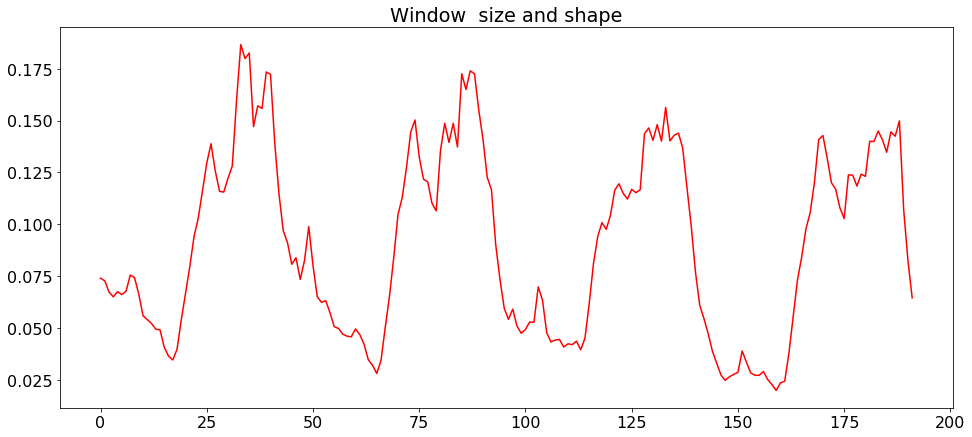

In [46]:
# Plot window size. Is this a good window  so that LSTM can get a glipse of the sequence?
plt.figure(figsize=(16,7))
plt.plot(data_train[:window],'r')
plt.title('Window  size and shape')
plt.show()

In [47]:
# Convert the time series data into supervised!! Do I need to use seq_len or seq_len-1 in the for loop
def to_supervised(dataSet, seq_len):
    data_x,data_y=[],[]
    for ii in range(len(dataSet)-seq_len):
             
        a=dataSet[ii:(ii+seq_len),0]
        data_x.append(a)
        data_y.append(dataSet[ii + seq_len, 0])
#         print(ii)
#         if ii>5:
#             stop
        
    return np.array(data_x),np.array(data_y)

In [48]:
train_x,train_y=to_supervised(data_train,window)
test_x,test_y=to_supervised(data_test,window)
print('The shape of  train_x: {} train_y: {}'.format(train_x.shape,train_y.shape))
print('The shape of test_x: {} test_y: {}'.format(test_x.shape,test_y.shape))

The shape of  train_x: (85184, 192) train_y: (85184,)
The shape of test_x: (528, 192) test_y: (528,)


In [49]:
# LSTM wants the data in the sahpe of (N,W,F) where N is the number of training sequences, W is the sequence 
#length and F: number of features of each sequence. In our case (N=4200(701),W=50, F=1)
def to_reshape(dataX):
    data_xx=np.reshape(dataX,(dataX.shape[0],dataX.shape[1],1))
    print('The shape of of the data is: {}'.format(data_xx.shape))
    return data_xx

In [50]:
train_x=to_reshape(train_x)
test_x=to_reshape(test_x)

The shape of of the data is: (85184, 192, 1)
The shape of of the data is: (528, 192, 1)


In [51]:
# Le us build our  model 
model=Sequential()
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [52]:
# Fit the model, and print the time it takes to trian.
t0 = time.time()
model.fit(train_x,train_y, validation_data=(test_x, test_y),epochs = 5, batch_size = 1000)

t1 = time.time()

total = t1-t0
print('Total time taken to fit the model is {} '.format(total))

Train on 85184 samples, validate on 528 samples
Epoch 1/5
85184/85184 [==============================] - 312s 4ms/step - loss: 0.0157 - val_loss: 0.0121
Epoch 2/5
85184/85184 [==============================] - 288s 3ms/step - loss: 0.0047 - val_loss: 0.0086
Epoch 3/5
85184/85184 [==============================] - 293s 3ms/step - loss: 0.0032 - val_loss: 0.0051
Epoch 4/5
85184/85184 [==============================] - 289s 3ms/step - loss: 0.0025 - val_loss: 0.0044
Epoch 5/5
85184/85184 [==============================] - 288s 3ms/step - loss: 0.0021 - val_loss: 0.0033
Total time taken to fit the model is 1473.1401951313019 


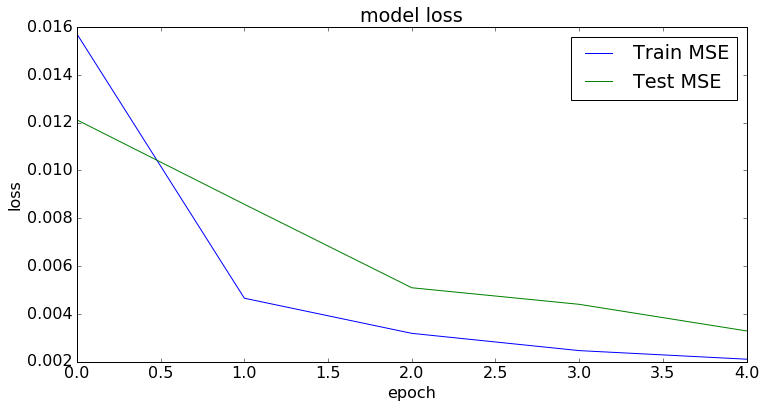

In [53]:
#plot the training and test loss!
plt.style.use('classic')
%matplotlib inline
fig = plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 16})
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train MSE', 'Test MSE'], loc='upper right')
plt.show()

fig.savefig('modelLoss_vTEC.png', dpi=500)

In [54]:
# make predictions for the trainig and test sets
trainPredict = model.predict(train_x, batch_size = 32)
model.reset_states()
testPredict = model.predict(test_x, batch_size = 32)

trainPredict = trainPredict.astype('float32')
testPredict= np.reshape(testPredict, (-1, 1))

In [55]:
train_y= np.reshape(train_y, (-1, 1))
test_y= np.reshape(test_y, (-1, 1))

In [56]:
# scale back the predicted data
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(train_y)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(test_y)

In [57]:
testY.max()

72.30489

In [59]:
xticksR=[x for x in range(0,528,50)]

In [60]:
data_i=toDateTest.values

In [61]:
data_i[xticksR]

array(['2013-12-20T23:15:00.000000000', '2013-12-22T00:15:00.000000000',
       '2013-12-23T01:15:00.000000000', '2013-12-24T02:15:00.000000000',
       '2013-12-25T03:15:00.000000000', '2013-12-26T04:15:00.000000000',
       '2013-12-27T05:15:00.000000000', '2013-12-28T06:15:00.000000000',
       '2013-12-29T07:15:00.000000000', '2013-12-30T08:15:00.000000000',
       '2013-12-31T09:15:00.000000000'], dtype='datetime64[ns]')

In [62]:
toDateTest[xticksR]

0     2013-12-20 23:15:00
50    2013-12-22 00:15:00
100   2013-12-23 01:15:00
150   2013-12-24 02:15:00
200   2013-12-25 03:15:00
250   2013-12-26 04:15:00
300   2013-12-27 05:15:00
350   2013-12-28 06:15:00
400   2013-12-29 07:15:00
450   2013-12-30 08:15:00
500   2013-12-31 09:15:00
dtype: datetime64[ns]

In [63]:
xticksR=['2013-12-20 23:15','2013-12-22 00:15', '2013-12-23 01:15', '2013-12-24 02:15',
   '2013-12-25 03:15',
   '2013-12-26 04:15',
  '2013-12-27 05:15',
  '2013-12-28 06:15',
  '2013-12-29 07:15',
 '2013-12-30 08:15',
 '2013-12-31 09:15']

In [64]:
xticksR=['20 23:15','22 00:15', '23 01:15', '24 02:15',
   '25 03:15',
   '26 04:15',
  '27 05:15',
  '28 06:15',
  '29 07:15',
 '30 08:15',
 '31 09:15']

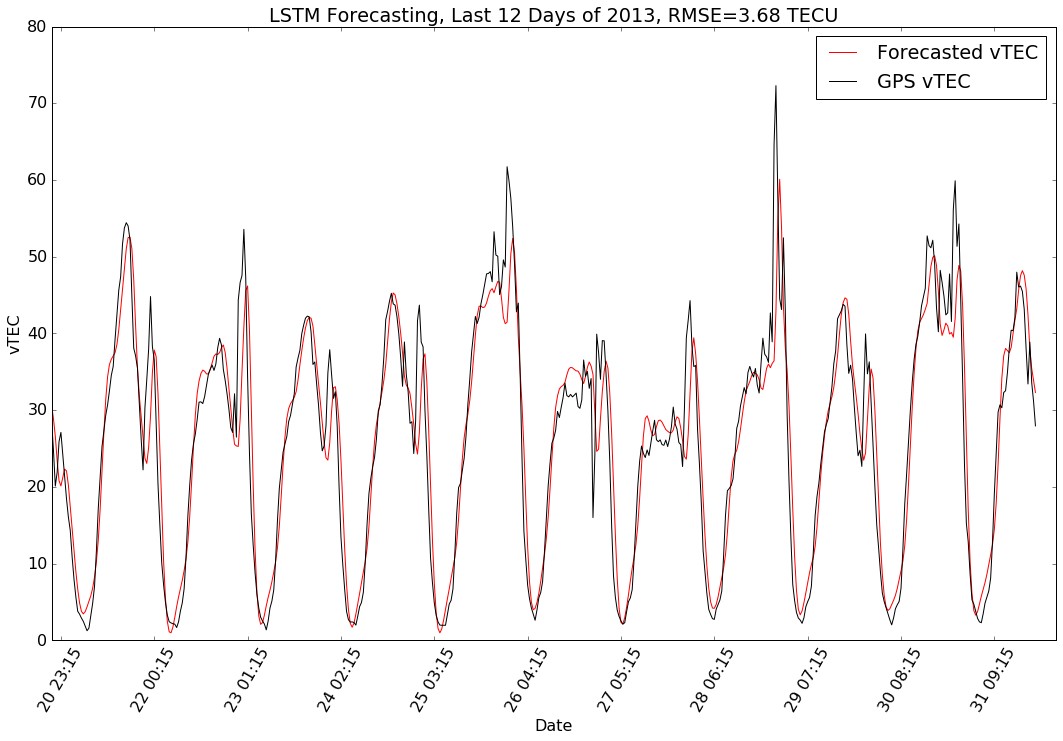

In [65]:
# plot the prediction and the test set together. NB in this case the prediction is done in a point-by-point way, 
#that is we are predictiong a single point a head each time! plotting this point as a prediction, then taking 
#the next window along with the full testing data and predicting the next point along once again. 
plt.figure(figsize=(18,11))
plt.plot(testPredict,'r', label='Forecasted vTEC')
plt.plot(testY,'k',label='GPS vTEC')
plt.title('LSTM Forecasting, Last 12 Days of 2013, RMSE=3.68 TECU')
plt.ylabel('vTEC')
plt.xlabel('Date')
plt.xlim(0,len(testY)+10)
plt.xticks(np.arange(5,528,50),xticksR,rotation=60)
plt.legend()
plt.rcParams.update({'font.size': 16,'lines.linewidth':1.5})
plt.legend()
plt.savefig('LSTMforecastNewBatch1000.eps', facecolor='w', format='eps')
plt.show()

In [1]:
print('The End!!!')

The End!!!
